<a href="https://www.kaggle.com/code/caueausec/florianopolis-rent-pricing-dataset-eda?scriptVersionId=148028353" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [53]:
 !pip install ptitprince

In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import plotly.express as px
import ptitprince as pt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/florianpolis-rent-pricing-dataset/LICENSE
/kaggle/input/florianpolis-rent-pricing-dataset/README.md
/kaggle/input/florianpolis-rent-pricing-dataset/florianopolis-rent-pricing.ipynb
/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv


# Carregar dados para um Dataframe

In [55]:
# Definindo a tipagem dos dados por coluna
dtypes = {
          'data': 'datetime64[s]',
          'fonte':'str',
          'descricao': 'str',
          'endereco':'str',
          'rua': 'str',
          'numero': 'float',
          'bairro':'category',
          'cidade': 'category',
          'valor':'float',
          'periodicidade': 'category',
          'condominio': 'float',
          'area':'float',
          'qtd_banheiros': 'float',
          'qtd_quartos':'float',
          'qtd_vagas':'float',
          'url':'str'
          }

In [56]:
# Importando o arquivo do dataset e carregando a tipagem
df = pd.read_csv('/kaggle/input/florianpolis-rent-pricing-dataset/dataset.csv',index_col=0) # Coluna 0 serve como índice
df = df.astype(dtypes)
pd.set_option('display.precision', 2) # Definindo a precisão em dígitos com a qual os números float64 serão exibidos.

# Observando exemplos de registros:

In [57]:
df = df.sample(n=999,random_state=443) # Amostra aleatória de 10 registros, reproduzível com a seed 443 no parâmetro 'random_state'.

> Podemos ver que há anúncios mensais e diários, e em ambos os casos o valor de condomínio precisa ser acrescido do valor total, faremos da seguinte forma:

In [58]:
df['area'] = pd.to_numeric(df['area'].fillna(0))
df['condominio'] = pd.to_numeric(df['condominio'].fillna(0))
df['valor_corrigido'] = pd.to_numeric(df.apply(lambda row: row['valor'] + row['condominio'] if not pd.isnull(row['valor']) and not pd.isnull(row['condominio']) else row['valor'], axis=1).fillna(0))
df

,data,fonte,descricao,endereco,rua,numero,bairro,cidade,valor,periodicidade,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,url,valor_corrigido
1665,2023-10-25 22:54:01,Viva Real,"Kitnet/Conjugado com Quarto para Aluguel, 40m²","São João do Rio Vermelho, Florianópolis , SC",São João do Rio Vermelho,NaN,São João do Rio Vermelho,florianopolis,1650.0,Mês,0.0,40.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/kitnet-1-quarto...,1650.0
1235,2023-10-25 22:53:27,Viva Real,"Apartamento com 2 Quartos para Aluguel, 75m²","Rua Visconde de Ouro Preto, 463 , Centro, Flor...",Rua Visconde de Ouro Preto,NaN,Centro,florianopolis,3700.0,Mês,0.0,75.0,2.0,2.0,NaN,https://vivareal.com.br/imovel/apartamento-2-q...,3700.0
4712,2023-10-25 22:58:20,Viva Real,"Casa com 2 Quartos para Aluguel, 50m²","Rua Luiz Pasteur , Trindade, Florianópolis , SC",Rua Luiz Pasteur,NaN,Trindade,florianopolis,1750.0,Mês,0.0,50.0,1.0,2.0,NaN,https://vivareal.com.br/imovel/casa-2-quartos-...,1750.0
1860,2023-10-25 22:54:16,Viva Real,"Apartamento com 2 Quartos para Aluguel, 44m²","Avenida Marinheiro Max Schramm, 2428 , Jardim ...",Avenida Marinheiro Max Schramm,NaN,Jardim Atlântico,florianopolis,1100.0,Mês,345.0,44.0,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,1445.0
3201,2023-10-25 22:56:04,Viva Real,"Casa com 4 Quartos para Aluguel, 100m²","Rua Desembargador Rid Silva, 336 , Canasvieira...",Rua Desembargador Rid Silva,NaN,Canasvieiras,florianopolis,2000.0,Dia,0.0,100.0,3.0,4.0,NaN,https://vivareal.com.br/imovel/casa-4-quartos-...,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025,2023-10-25 22:54:30,Viva Real,"Kitnet/Conjugado com Quarto para Aluguel, 40m²","São João do Rio Vermelho, Florianópolis , SC",São João do Rio Vermelho,NaN,São João do Rio Vermelho,florianopolis,1650.0,Mês,0.0,40.0,1.0,1.0,1.0,https://vivareal.com.br/imovel/kitnet-1-quarto...,1650.0
5384,2023-10-25 22:59:21,Viva Real,"Sala/Conjunto para Aluguel, 53m²","Rua Jerônimo Coelho, 383 , Centro, Florianópol...",Rua Jerônimo Coelho,NaN,Centro,florianopolis,1900.0,Mês,0.0,53.0,1.0,NaN,1.0,https://vivareal.com.br/imovel/sala-comercial-...,1900.0
6082,2023-10-25 23:00:24,Viva Real,"Apartamento com 2 Quartos para Aluguel, 130m²","Rua Madre Maria Vilac, 604 , Canasvieiras, Flo...",Rua Madre Maria Vilac,NaN,Canasvieiras,florianopolis,700.0,Dia,0.0,130.0,1.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,700.0
182,2023-10-25 22:52:03,Viva Real,"Apartamento com 2 Quartos para Aluguel, 60m²","Rua Alves de Brito, 345 , Centro, Florianópoli...",Rua Alves de Brito,NaN,Centro,florianopolis,3950.0,Mês,685.0,60.0,2.0,2.0,1.0,https://vivareal.com.br/imovel/apartamento-2-q...,4635.0


# Avaliando os tipos e consistência das colunas

In [59]:
#Informações sobre as colunas do dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1665 to 1671
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype        
---  ------           --------------  -----        
 0   data             999 non-null    datetime64[s]
 1   fonte            999 non-null    object       
 2   descricao        999 non-null    object       
 3   endereco         999 non-null    object       
 4   rua              999 non-null    object       
 5   numero           0 non-null      float64      
 6   bairro           999 non-null    category     
 7   cidade           999 non-null    category     
 8   valor            999 non-null    float64      
 9   periodicidade    999 non-null    category     
 10  condominio       999 non-null    float64      
 11  area             999 non-null    float64      
 12  qtd_banheiros    999 non-null    float64      
 13  qtd_quartos      939 non-null    float64      
 14  qtd_vagas        887 non-null    float64      
 15  url    

> Parece que temos um erro na coluna 'numero'...

In [60]:
# Extraíndo medidas descritivas de variáveis quantitativas
df.describe()

,data,numero,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_corrigido
count,999,0.0,999.00,999.00,999.00,999.00,939.00,887.00,999.00
mean,2023-10-25 22:57:04,NaN,2580.75,186.88,86.57,1.78,2.35,1.20,2767.63
min,2023-10-25 22:51:48,NaN,700.00,0.00,30.00,1.00,1.00,1.00,700.00
25%,2023-10-25 22:54:24,NaN,1750.00,0.00,58.00,1.00,2.00,1.00,1750.00
50%,2023-10-25 22:57:02,NaN,2400.00,0.00,75.00,2.00,2.00,1.00,2613.00
75%,2023-10-25 22:59:49,NaN,3300.00,430.00,95.00,2.00,3.00,1.00,3700.00
max,2023-10-25 23:02:30,NaN,5800.00,685.00,250.00,5.00,5.00,3.00,5800.00
std,NaN,NaN,1098.58,254.13,48.60,1.01,0.94,0.45,1203.57


<Axes: xlabel='valor_corrigido', ylabel='periodicidade'>

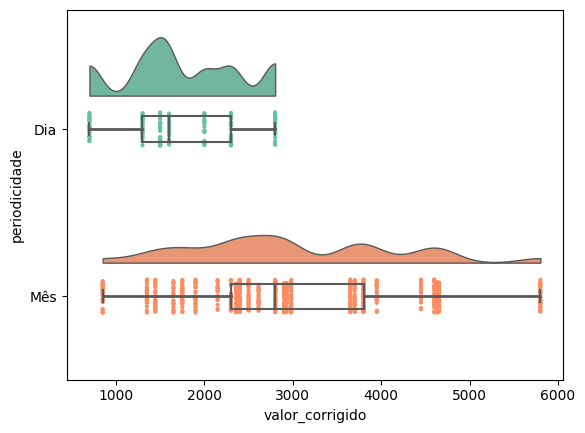

In [85]:
df['valor_corrigido'] = df['valor_corrigido'].astype('int32')
pt.RainCloud(data=df,y='valor_corrigido',x='periodicidade',orient='h')

<Axes: xlabel='valor', ylabel='periodicidade'>

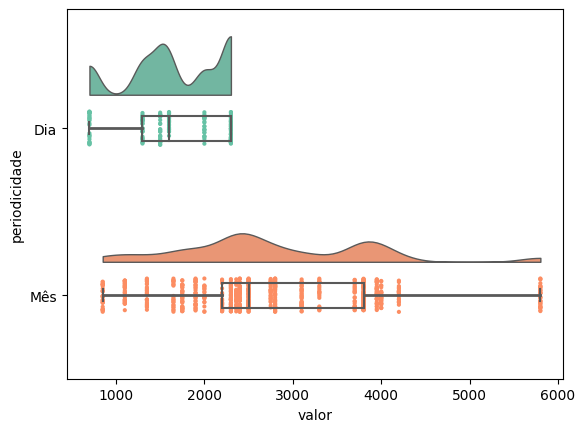

In [86]:
df['valor'] = df['valor'].astype('int32')
pt.RainCloud(data=df,y='valor',x='periodicidade',orient='h')

<Axes: xlabel='area', ylabel='periodicidade'>

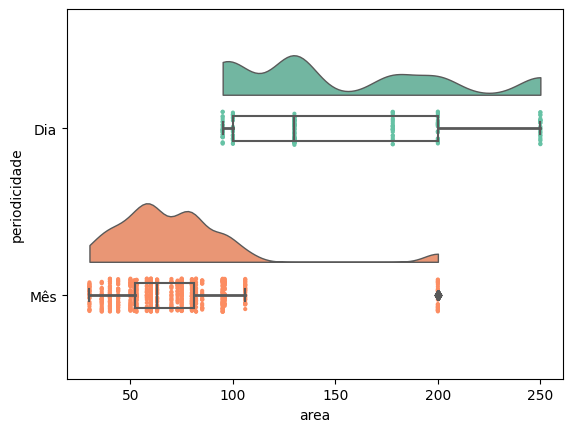

In [87]:
df['area'] = df['area'].astype('int32')
pt.RainCloud(data=df,y='area',x='periodicidade',orient='h')

<Axes: xlabel='condominio', ylabel='periodicidade'>

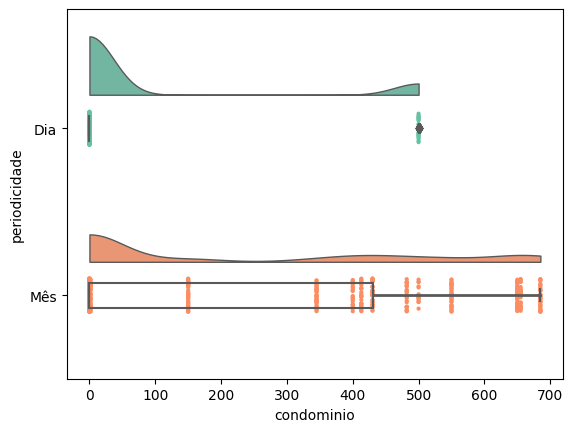

In [88]:
df['condominio'] = df['condominio'].astype('int32')
pt.RainCloud(data=df,y='condominio',x='periodicidade',orient='h')

# Calculando correlação de variáveis quantitativas

In [63]:
# Estimando correlação de variaveis quantitativas
df_corr = df[[
            'valor',
            'condominio',
            'area',
            'qtd_banheiros',
            'qtd_quartos',
            'qtd_vagas',
            'valor_corrigido'
            ]]
df_corr = df_corr.corr()
df_corr

,valor,condominio,area,qtd_banheiros,qtd_quartos,qtd_vagas,valor_corrigido
valor,1.00,0.32,0.22,0.21,0.26,4.69e-02,9.80e-01
condominio,0.32,1.00,-0.18,0.05,-0.06,-2.16e-01,5.01e-01
area,0.22,-0.18,1.00,0.67,0.76,6.74e-01,1.63e-01
qtd_banheiros,0.21,0.05,0.67,1.00,0.62,5.35e-01,2.06e-01
qtd_quartos,0.26,-0.06,0.76,0.62,1.00,5.41e-01,2.22e-01
qtd_vagas,0.05,-0.22,0.67,0.54,0.54,1.00e+00,-4.23e-03
valor_corrigido,0.98,0.50,0.16,0.21,0.22,-4.23e-03,1.00e+00


In [64]:
# Importando Plotly para visualizações:

fig = px.imshow(df_corr)
fig.show()

# Calculando Distribuição das variáveis qualitativas

In [65]:
# Listando todas as variáveis
columns = df.columns
columns

Index(['data', 'fonte', 'descricao', 'endereco', 'rua', 'numero', 'bairro',
       'cidade', 'valor', 'periodicidade', 'condominio', 'area',
       'qtd_banheiros', 'qtd_quartos', 'qtd_vagas', 'url', 'valor_corrigido'],
      dtype='object')

In [66]:
# Criando uma lista com colunas qualitativas
qualitative = ['bairro','periodicidade']

In [67]:
df_bairro = pd.DataFrame(df['bairro'].value_counts()).reset_index()
fig = px.bar(df_bairro, y='bairro', x='count', color='bairro')
fig.show()

> A distribuição não parece normal, algo no algorítmo do site pode influenciar nisso, ou até mesmo o script de coleta.

In [68]:
df_periodicidade = pd.DataFrame(df['periodicidade'].value_counts()).reset_index()
fig = px.bar(df_periodicidade, y='periodicidade', x='count', color='periodicidade')
fig.show()

# Correlação de Variáveis:

### Area vs. Valor:

In [69]:
df_scatter = df[['area','valor_corrigido','qtd_quartos','periodicidade']].copy()
fig = px.scatter(df_scatter, x='area',y='valor_corrigido',color='periodicidade',size='valor_corrigido',size_max=20,height=800,trendline='ols',render_mode='svg')
fig.show()